**Delivery Data Analysis and Predictive Modeling: Exploring Task Dynamics and Optimizing Performance**

- Writer : Ridlo Ali Nuryanto (Ido Ali)
- Date : June 12 2023

---

# Background

The delivery industry plays a crucial role in the modern economy, ensuring the timely transportation of goods and enhancing customer satisfaction. With the increasing demand for efficient and reliable delivery services, it is essential for companies to gain insights into their delivery operations and identify opportunities for optimization.

The purpose of this project is to provide a sample demonstration of how data analysis and machine learning techniques can be implemented in the logistics industry. It is important to note that this project represents a limited scope and serves as a starting point for further research and development in this field.

While the dataset used for this project spans a 3 days period and includes various attributes related to delivery operations, it is essential to acknowledge that a comprehensive analysis of the logistics industry requires more extensive time, data, and resources. The complexities and nuances of real-world logistics scenarios necessitate a deeper exploration and a larger-scale study to capture a broader range of factors and their interplay.

By conducting this sample project, we aim to showcase the potential benefits and applications of leveraging data in the logistics industry. The exploratory data analysis and machine learning model developed herein provide a glimpse into the insights that can be derived from delivery data and how they can contribute to optimizing operations.



# Import Data & Libraries

The data is in `json` format. After we get the data imported, we will change it to a pandas dataframe. Hence why we need to import both `json` and `pandas` libraries.

In [1]:
import json
import pandas as pd
import plotly.express as px
import plotly.io as pio

# change the rendered
pio.renderers.default = "notebook_connected"

j = open("data/data-sample.json")
data = json.load(j)
df = pd.DataFrame(data)

Now let's see how the data looks like

In [2]:
df.head()

,taskLocationDone,taskCreatedTime,cod,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,UserVar
0,"{'lon': 109.7629103, 'lat': -6.9266078}",2022-11-01 20:17:26 +0700,"{'amount': 685000, 'received': True}",pacifiedLion0,2022-11-01 20:46:30 +0700,done,Delivery,4fe3b237c832ca4841a2,"{'branch_dest': 'SRG', 'taskStatusLabel': 'Suc..."
1,"{'lon': 110.0339859, 'lat': -7.8761542}",2022-11-01 08:41:07 +0700,"{'amount': 53500, 'received': True}",peacefulTacos6,2022-11-01 12:33:48 +0700,done,Delivery,08a4da25256affae8446,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc..."
2,"{'lon': 109.999733, 'lat': -7.8497773}",2022-11-01 08:41:07 +0700,"{'amount': 179500, 'received': True}",peacefulTacos6,2022-11-01 13:41:57 +0700,done,Delivery,2ff0dc469826158b7684,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc..."
3,"{'lon': 110.0037077, 'lat': -7.710998}",2022-11-01 08:41:07 +0700,"{'amount': 31815, 'received': True}",peacefulTacos6,2022-11-01 18:18:19 +0700,done,Delivery,331c172c2b383f774328,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc..."
4,"{'lon': 110.0138869, 'lat': -7.8297416}",2022-11-01 08:41:07 +0700,"{'amount': 144562, 'received': True}",peacefulTacos6,2022-11-01 10:51:49 +0700,done,Delivery,a9d53fa96c80baee8b23,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc..."


# Data Preprocessing

As you can see above, in our `df` dataframe, we still have columns with dictionary inside of them. We can't analyze this data further if we didn't pull out these dictionaries. 

In [3]:
# changing dictionary column to a dataframe
def get_df_from_dict(col):
    keys = list(data[0][col].keys())
    thedict = {}

    for k in list(keys):
        getdict = [x.get(col) for x in data]
        thedict[k] = [x.get(k) for x in getdict if x is not None]
    
    thedf = pd.DataFrame(thedict)
    return thedf

# list of columns with dictionary
filled_col = ["taskLocationDone", "cod", "UserVar"]

# each of new dataframe that we obtain from dictionaries
loc_df = get_df_from_dict(filled_col[0])
cod_df = get_df_from_dict(filled_col[1])
var_df = get_df_from_dict(filled_col[2])

# there will be columns with the same name. So then we need to change one of them
var_df.rename(columns = {"taskStatus" : "taskStatusCode"}, inplace = True)

# drop all columns with dictionaries
df.drop(filled_col, axis = 1, inplace = True)

# concatinate all dataframes
df = pd.concat([df, loc_df, cod_df, var_df], axis = 1)

After we applied the code above, we shall check how our data was changed. 

In [4]:
df.head()

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,lon,lat,amount,received,branch_dest,taskStatusLabel,receiver_city,taskDetailStatusLabel,taskDetailStatus,weight,branch_origin,taskStatusCode
0,2022-11-01 20:17:26 +0700,pacifiedLion0,2022-11-01 20:46:30 +0700,done,Delivery,4fe3b237c832ca4841a2,109.762910,-6.926608,685000.0,True,SRG,Success,"BATANG ,KAB BATANG",YANG BERSANGKUTAN,D01,13,CGK,COLF01
1,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 12:33:48 +0700,done,Delivery,08a4da25256affae8446,110.033986,-7.876154,53500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,1.3,CGK,COLF01
2,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 13:41:57 +0700,done,Delivery,2ff0dc469826158b7684,109.999733,-7.849777,179500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,COLF01
3,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 18:18:19 +0700,done,Delivery,331c172c2b383f774328,110.003708,-7.710998,31815.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,0.625,CGK,COLF01
4,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 10:51:49 +0700,done,Delivery,a9d53fa96c80baee8b23,110.013887,-7.829742,144562.0,True,MGL,Success,"BAGELEN,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,COLF01


Below is shown the description for each columns. 

Data Description : 
- `taskId` : Unique identifier for the task that was generated by the system.
- `taskCreatedTime` : Time at which the task was created.
- `taskCompletedTime` : Time at which the task was completed.
- `taskAssignedTo` : Worker assigned to the task.
- `taskLocationDone` : Coordinate of where the task was completed.
- `flow` : Flow or type of the task.
- `cod.amount` : Amount of money from COD.
- `cod.received` : Whether COD has been received or not.
- `UserVar.taskStatus` : Delivery status code.
- `UserVar.taskStatusLabel` : Delivery status label.
- `UserVar.taskDetailStatus` : Detailed delivery status code.
- `UserVar.taskDetailStatusLabel` : Detailed delivery status label.
- `UserVar.branch_origin` : Branch code of the origin.
- `UserVar.branch_dest` : Branch code of the destination.
- `UserVar.weight` : Weight of the package.


## Changing Incorrect Formats

Change the date time data to the correct format. 

In [5]:
df["taskCreatedTime"] = pd.to_datetime(df["taskCreatedTime"], utc = True)
df["taskCompletedTime"] = pd.to_datetime(df["taskCompletedTime"], utc = True)

## Checking Null Values

Let's see how many Null data we have. 

In [6]:
df.isnull().sum()

taskCreatedTime             0
taskAssignedTo              1
taskCompletedTime         768
taskStatus                  0
flow                        0
taskId                      0
lon                       768
lat                       768
amount                   5976
received                 5976
branch_dest                 0
taskStatusLabel           762
receiver_city              52
taskDetailStatusLabel     762
taskDetailStatus          762
weight                      0
branch_origin             293
taskStatusCode            762
dtype: int64

We won't drop all these Null data, unless later when we want to make the Machine Learning model. 

# Exploratory Data Analysis
## Analyzing Task Completion Time Distribution
The task completion time distribution provides valuable insights into the efficiency of delivery operations.

In [7]:
# We only select columns that we want to analyze. Then we drop all the null values. 
timedata = df[["taskCompletedTime", "taskCreatedTime", "flow"]].dropna().reset_index(drop = True)

# We find the time differences
timediff = []
for x in range(len(timedata)):
    y = timedata["taskCompletedTime"][x] - timedata["taskCreatedTime"][x]
    timediff.append(y.seconds / (60 * 60))

# Make a histogram using plotly
hist = px.histogram(timediff, title = "The Completion Time", 
                    labels = {"value" : "Hours"})
hist.update_layout(showlegend = False)

By examining the histogram above, we observe that the majority of deliveries are completed within a span of less than 2 hours. However, it is essential to investigate the factors contributing to deliveries that exceed the two-hour mark by analyzing additional data.

To understand the causes behind longer delivery times, we need to explore various factors such as the distance between cities, the specific times at which deliveries are made, and any other relevant variables. These factors may influence the overall duration of the delivery process and shed light on why certain tasks take longer than others.

By thoroughly investigating these additional data sources, we can gain a comprehensive understanding of the underlying reasons for extended task completion times. This knowledge will enable us to identify areas for improvement, implement strategies to reduce delivery durations, and optimize the overall efficiency of the delivery system.

## Analyzing the Most Profitable Time

In this analysis, we will examine the time at which the company has obtained the highest profits based on the available data. 

_Although our dataset does not directly provide profit information, we can utilize the `amount` column, which represents the amount of money generated from each delivery service. We assume there is a positive correlation between `amount` and profit._

In [8]:
rev = df[["taskCompletedTime", "amount"]].dropna().reset_index(drop = True)

print(rev["taskCompletedTime"].min())
print(rev["taskCompletedTime"].max())

2022-11-01 02:08:55+00:00
2022-11-03 01:23:11+00:00


The dataset we have at hand covers a period of only 3 days. Consequently, our analysis will focus on daily-based insights.

<AxesSubplot:ylabel='date'>

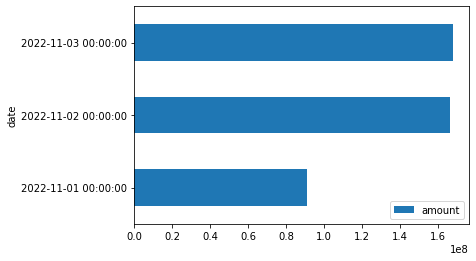

In [9]:
# Get date only and dropping all hours, minutes and seconds 
rev["date"] = pd.to_datetime([f"2022-11-{x.day}" for x in rev["taskCompletedTime"]])

# Make a visualization
rev[["amount", "date"]].groupby("date").sum().plot(kind = "barh")

By referring to the graph above, we observe that November 2 and 3 were the most profitable dates, with almost similar amounts. Notably, these dates fall on Wednesday and Thursday, respectively, while November 1 is Friday. 

To truly understand the differences between these days (since none of these days are weekends) and their impact on profitability, a more comprehensive and in-depth investigation is required.

## Failure Analysis

Let's see the distribution of our `taskStatusLabel` data. 

In [10]:
print(df.taskStatusLabel.value_counts())

failure_ratio = df.taskStatusLabel.value_counts()["Failed"] / (df.taskStatusLabel.value_counts()["Success"] + df.taskStatusLabel.value_counts()["Failed"])
print(f"\nDelivery Failure Percentage : {round(failure_ratio * 100, 1)}%")

Success    5427
Failed     2145
Name: taskStatusLabel, dtype: int64

Delivery Failure Percentage : 28.3%


As you can see above, the failure percentage is around 28.3%. This is such a high number. We need to analyze further what makes the failure rate is so high. 

### Analysis On Delivery Person Performance

In this section, we aim to identify the most active delivery persons and those with the highest number of failed deliveries. By pinpointing the delivery persons with the most failures, we can investigate the root causes, such as challenging locations, high workloads, vehicle issues, or personal reasons. Addressing these factors can help reduce the failure percentage and improve overall performance.

**Most Active Delivery Persons**

In [11]:
df[['taskAssignedTo', 'amount']].groupby('taskAssignedTo').agg({'amount' : ['count', 'sum']})\
                                                        .amount.sort_values("sum", ascending = False)\
                                                        .head(10)\
                                                        .rename(columns = {"count":"Task Assigned", "sum":"Money Received"})

,Task Assigned,Money Received
taskAssignedTo,,
sheepishFerret9,44,11345815.0
ashamedHare6,33,10233926.0
grumpyOcelot8,19,8104043.0
gutturalLion9,48,7651850.0
excitedBustard4,30,5646247.0
forsakenMuesli0,8,5322930.0
jumpyCockatoo6,15,4866478.0
offendedCow8,14,4849126.0
emptyIcecream6,57,4840194.0


The table above presents the most active delivery persons. Recognizing their hard work and dedication, we can reward them to foster a more enjoyable working environment and strengthen their commitment to the company.

**Delivery Persons with the Most Failed Delivery**

In [12]:
df[df.taskStatusLabel == "Failed"][['taskAssignedTo', 'taskStatusLabel']].groupby('taskAssignedTo')\
                    .count().sort_values("taskStatusLabel", ascending = False)\
                    .rename(columns = {"taskStatusLabel" : "Failures Count"}).head(15)

,Failures Count
taskAssignedTo,
gutturalLion9,103
gloomyLlama0,83
artisticHyena7,56
mellowDoughnut1,49
cautiousUnicorn6,46
scornfulOcelot0,42
outlyingDoughnut6,37
drearyPepper9,35
stressedRat6,33


The table displayed above highlights the delivery persons with the highest number of failures. 

**Reasons Why The Deliveries Failed**

Below shown `taskDetailStatusLabel` column when the `taskStatusLabel` is Failed. 

In [13]:
df[df.taskStatusLabel == "Failed"][["taskStatusLabel", "taskDetailStatusLabel"]]

,taskStatusLabel,taskDetailStatusLabel
681,Failed,ALAMAT TIDAK LENGKAP service/ TIDAK DIKENAL
683,Failed,MISROUTE
696,Failed,DITOLAK OLEH PENERIMA
697,Failed,DITOLAK OLEH PENERIMA
699,Failed,PENERIMA PINDAH ALAMAT
...,...,...
8309,Failed,RUMAH service/ KANTOR KOSONG (MASIH DIHUNI)
8310,Failed,MISROUTE
8323,Failed,ALAMAT TIDAK LENGKAP service/ TIDAK DIKENAL
8330,Failed,ALAMAT TIDAK LENGKAP service/ TIDAK DIKENAL


> The primary causes of failed deliveries are often attributed to **incorrect addresses** or instances where the recipient has relocated to a different location.

### Analysis On the City Profit

In the following analysis, we will examine the profitability and failed delivery rates for each cities. By identifying cities with the highest number of failed deliveries, we can investigate and address the underlying problems once the root causes are identified.

In [14]:
# function to get a district name and city name
def get_city_name(full):
    if full == None:
        district, city = None, None
    else:
        full_text = full.split(",")
        city = full_text[-1]
        district = full_text[0]
    return district, city

district = []
city = []

df["receiver_city"] = [x.title() if x is not None else None for x in df["receiver_city"]] 

for x in df["receiver_city"]:
    district_app, city_app = get_city_name(x)
    district.append(district_app)
    city.append(city_app)
    
df["district"] = district
df["city"] = city

**The Most Successful Cities**

Our analysis aims to identify the most successful cities based on their delivery volume and earnings.

In [15]:
# Make a table of the most successful city
df[['city', 'amount']].groupby('city').agg({'amount' : ['count', 'sum']})\
                                                        .amount.sort_values("sum", ascending = False)\
                                                        .head(10)\
                                                        .rename(columns = {"count":"Total Tasks", "sum":"Money Received"},
                                                                index = {"" : "Unknown"})

,Total Tasks,Money Received
city,,
Bogor,62,13132351.0
Kupang,50,13000996.0
Purworejo,104,10775110.0
Muara Bel,30,10140787.0
Timika,37,9495740.0
Cianjur,89,9378692.0
Kab.Sintang,24,8711725.0
Unknown,44,7579116.0
Den,30,6452384.0


Based on the data shown above, **Bogor** and **Kupang** emerge as the most successful cities in terms of revenue generated from deliveries. However, it is noteworthy that **Purworejo** has the highest number of deliveries despite relatively lower earnings.

**Cities with the Highest Numbers of Failed Delivery**

The table below presents the cities with the highest number of failed deliveries. Notably, there are multiple errors and incomplete city names in the dataset. While text preprocessing could address these issues, it is beyond the scope of this analysis.

In [16]:
df[df.taskStatusLabel == "Failed"][['city', 'taskStatusLabel']].groupby('city')\
                    .count().sort_values("taskStatusLabel", ascending = False).head(15)\
                    .rename(index = {"" : "Unknown"})

,taskStatusLabel
city,
Pale,77
Unknown,65
Kubu Ray,65
Palembang,62
Pon,58
Kab Pa,46
Kupang,43
Kab.Kutai,43
Banjarnega,39


# Predictive Modeling
## Data Preprocessing

In this section, our objective is to develop a machine learning model for predicting the success of deliveries. However, not all columns in the dataset are relevant for this particular task. We will selectively choose a subset of columns that are deemed important for training the model. Additionally, we will perform further data preprocessing tailored specifically to the needs of our machine learning model. This preprocessing phase will prioritize the requirements of the model and ensure compatibility between the data and the machine learning algorithms employed.

The data We will be using are : 
- `city_success_ratio` : The success rate of delivery based on the city
- `weight` : The weight of the delivered items
- `amount` : The amount of money received for each delivery task
- `timedifference` : Time spent for delivering the items

> Note : `timedifference` is unlikely to have a direct impact on the success of the delivery. But why we use it as one of our predictors? `timedifference` exhibits a linear correlation with the distance between destination and sender's location, which is the crucial data for our model. As we lack the distance information, we will temporarily substitute it with `timedifference` due to their linear relationship.

Now, let's collect our selected data before we preprocess them further

In [17]:
ml_data = df[["city", "weight", "amount", "taskCompletedTime", "taskCreatedTime", "taskStatusLabel"]].dropna()

**Success Ratio For Each City**

In [18]:
# Strip the whitespace in the beginning of city names
ml_data["city"] = [x.lstrip() if x is not None else None for x in ml_data["city"]]

# make a dictionary we can use later to change df dataframe
da = pd.DataFrame(ml_data[["city", "taskStatusLabel"]].dropna().groupby("city").value_counts()).reset_index(1)\
                                                        .pivot(columns = "taskStatusLabel", values = 0).fillna(0) 
db = da["Success"] / (da["Success"] + da["Failed"])
db = db.fillna(0).to_dict()

# change the city names with its success ratio
ml_data["city_success_ratio"] = [db[x] for x in ml_data["city"]]
ml_data.drop("city", axis = 1, inplace = True)

**Time Spent On Deliveries**

In [19]:
timedata = ml_data[["taskCompletedTime", "taskCreatedTime"]].reset_index(drop = True)

# We find the time differences
timediff = []
for x in range(len(timedata)):
    if timedata.iloc[x].isnull().sum() == 0:
        y = timedata["taskCompletedTime"][x] - timedata["taskCreatedTime"][x]
        y = y.seconds / (60 * 60)
    else:
        y = None
    timediff.append(y)
    
ml_data["timedifference"] = timediff

## Cross Validation

This section focuses on the division of our data into two major groups: training data and testing data. The training data will be utilized to train our model, while the testing data will be used for evaluation purposes.

In [20]:
from sklearn.model_selection import train_test_split

# Drop taskCompletedTime and taskCreatedTime
ml_data.drop(["taskCompletedTime", "taskCreatedTime"], axis = 1, inplace = True)

# Split data using train_test_split function from sklearn
x_train, x_test, y_train, y_test = train_test_split(ml_data.drop("taskStatusLabel", axis = 1),
                                                    ml_data["taskStatusLabel"],
                                                    test_size = 0.3)

## Fitting Model
Now, we have reached the stage where we will fit our data to our selected machine learning models. We will be utilizing three models for this task:

1. **Logistic Regression**: This model is ideal when our data exhibits a linear relationship, particularly between the `taskStatusLabel` column and the other features. Logistic Regression will provide us with a mathematical equation that allows us to interpret the factors influencing the success of a delivery.

2. **Naive Bayes Classifier**: Although Naive Bayes is not originally designed for handling numerical data, it can handle nonlinear data better than Logistic Regression. Additionally, we can interpret the Naive Bayes model and gain insights from its predictions.

3. **Gradient Boosting Classifier**: As an ensemble method, Gradient Boosting is renowned for its strong performance. It excels at handling nonlinear relationships and effectively deals with imbalanced data. By leveraging `scikit-learn`, we can also obtain the feature importance scores, enabling us to assess the contribution of each predictor to the overall predictions.

In [21]:
# importing all the libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Fitting all the models
nb_model = GaussianNB().fit(x_train, y_train)
lr_model = LogisticRegression().fit(x_train, y_train)
gb_model = GradientBoostingClassifier().fit(x_train, y_train)

# Make predictions 
nb_preds = nb_model.predict(x_test)
lr_preds = lr_model.predict(x_test)
gb_preds = gb_model.predict(x_test)

## Model Evaluation

Now, we will evaluate our predictions using two metrics: accuracy and the confusion matrix. In this scenario, relying solely on accuracy is not sufficient due to the imbalanced nature of our target variable, `taskStatusLabel`. Therefore, we will complement accuracy with the confusion matrix to gain a more comprehensive understanding of our model's performance.

**Accuracy Score**

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# Finding accuracy using sklearn function
lr_acc = accuracy_score(y_test, lr_preds)
nb_acc = accuracy_score(y_test, nb_preds)
gb_acc = accuracy_score(y_test, gb_preds)

# Print the accuracy
print(f"Logistic Regression Model Accuracy : {round(lr_acc, 2)}")
print(f"Naive Bayes Model Accuracy : {round(nb_acc, 2)}")
print(f"Gradient Boosting Model Accuracy : {round(gb_acc, 2)}")

Logistic Regression Model Accuracy : 0.7
Naive Bayes Model Accuracy : 0.69
Gradient Boosting Model Accuracy : 0.96


Based on the results displayed above, the Gradient Boosting Model exhibits the highest accuracy among the evaluated models.

However, it is important to note that relying solely on accuracy may not provide a complete assessment due to the imbalanced nature of our target data. To gain deeper insights, let's analyze the confusion matrix.

**Confusion Matrix For Logistic Regression**

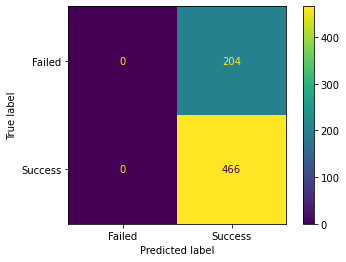

In [23]:
cm = confusion_matrix(y_test, lr_preds, labels = ["Failed", "Success"])
ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Failed", "Success"]).plot()

Upon examining the confusion matrix above, it is evident that our model did not make any predictions for Failed deliveries. This aligns with the limitations we previously discussed regarding Logistic Regression's struggle to accurately predict nonlinear data and its challenges in handling imbalanced datasets. 

We can expect a similar outcome with the Naive Bayes classifier, given its original design for handling categorical features rather than numerical data.

**Confusion Matrix For Naive Bayes Classifier**

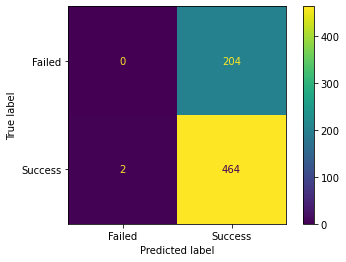

In [24]:
cm = confusion_matrix(y_test, nb_preds, labels = ["Failed", "Success"])
ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Failed", "Success"]).plot()

Not exactly the same but it is fair to say that it is similar. The Naive Bayes Classifier predicted one data as a failed delivery, but it is wrong. 

**Confusion Matrix For Gradient Boosting**

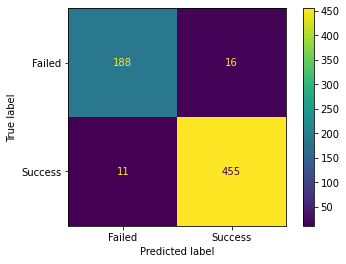

In [25]:
cm = confusion_matrix(y_test, gb_preds, labels = ["Failed", "Success"])
ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Failed", "Success"]).plot()

The displayed confusion matrix corresponds to our Gradient Boosting model, and its performance is quite satisfactory. However, it is evident from the confusion matrix that the model tends to exhibit better prediction for successful deliveries compared to failed deliveries. 

This imbalance in prediction accuracy can pose a challenge in the future, as it may lead to a bias towards the majority class, which in this case is successful deliveries. Nonetheless, we attribute this tendency to the inherent data imbalance in our dataset. Despite this, the overall performance of the model remains commendable.

## Model Interpretation

**Feature Importance**
Given that the Gradient Boosting model is the only one demonstrating satisfactory results, it becomes the only model suitable for interpretation. To extract the importance of each feature, we will utilize the `feature_importances_` attribute from `scikit-learn`.

In [26]:
px.bar(x = gb_model.feature_names_in_, y = gb_model.feature_importances_,
       title = "Feature Importance on the Success of Delivery",
       labels = {"x" : "Features",
                 "y" : "Importances"})

Based on the provided illustration, it is evident that the feature with the highest importance is `city_success_ratio`, accounting for over 80% importance. Following that, the feature `timedifference` holds a notable level of significance.

## Saving the Model

We will save the model for future use. We already developed 3 models but since there is only one that has a good performance, which is Gradient Boosting model, we will only save the Gradient Boosting model. 

In [27]:
from joblib import dump

dump(gb_model, "models/gradient_boost_model.joblib")

['models/gradient_boost_model.joblib']

For future use, you can execute the code below to get the Gradient Boosting model back

In [28]:
from joblib import load

model = load("models/gradient_boost_model.joblib")

# Conclusion
Here are a few conclusions we can make : 
- We observed that November 2 and 3 were the most profitable dates, with almost identical amounts. Notably, these dates fall on Wednesday and Thursday, respectively, while November 1 is Tuesday. Since none of these days are on the weekends, we need further research for the reason of why November 2 and 3 are more profitable.  
- The failed delivery ratio is 28.3% compared to total number deliveris. Most of the failed deliveries are due to receivers who have moved to a new address.
- Bogor and Kupang emerge as the most successful cities in terms of revenue generated from deliveries. However, it is noteworthy that Purworejo has the highest number of deliveries despite relatively lower earnings compared to Kupang and Bogor.
- Several cities have a higher number of failed deliveries compared to others. We cannot identify these cities since the data is incomplete. However, further actions need to be taken in these cities to prevent any more failed deliveries.
- Gradient Boosting is the best model for predicting the success of a delivery, achieving 94% accuracy.
- Based on the feature importance analysis of Gradient Boosting, the city of the receiver has an 82% importance on the success of the delivery. This indicates that to improve the company's service, we need to identify and address the root problems in these cities.